<a href="https://colab.research.google.com/github/sailajarani/ANN/blob/main/ANN_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chain rule
$$
\frac{d}{dx}\left [ f\left ( g\left ( x \right ) \right ) \right ] = f 
′
 (g(x))g 
′
 (x)
$$

if
$$f(x)=\frac{1}{1+e^{-x}}$$
then take $$p=-x ,  q=  1+e^{p}$$

then $$f(x)=f\left ( q  \left ( p\left ( x \right ) \right )\right )$$
i.e$$f(x) = \frac{1}{1+e^{p}} = \frac{1}q{}$$



then differentition of f(x)
$$\frac{df}{dx} = \frac{df}{dq} . \frac{dq}{dp}.\frac{dp}{dx}$$

$$\frac{df}{dx}=\left ( \frac{-1}{q^{2}} \right )\left ( e^{p} \right )\left ( -1 \right )$$
$$
\frac{df}{dx}=\left ( \frac{-1}{\left ( 1+e^{-x} \right )^{2}} \right )\left ( e^{-x} \right )\left ( -1 \right )$$
if simplify above equation we get following
$$
\frac{df}{dx}=f(x)(1-f(x))$$ for  $$f(x)=\frac{1}{1+e^{-x}}$$

## Back Propagation
We need to update the weights for the neuron to get error function minimum or zero. That is error function$$e=\left ( y-{y}' \right )^{2}$$ need to be zero or mininum.

Assume each layer has one neuron and bias to the neuron is zero.

Weight update equation is $$
w = w-\eta \Delta c  =w-\eta \left ( \frac{de}{dw} \right )$$
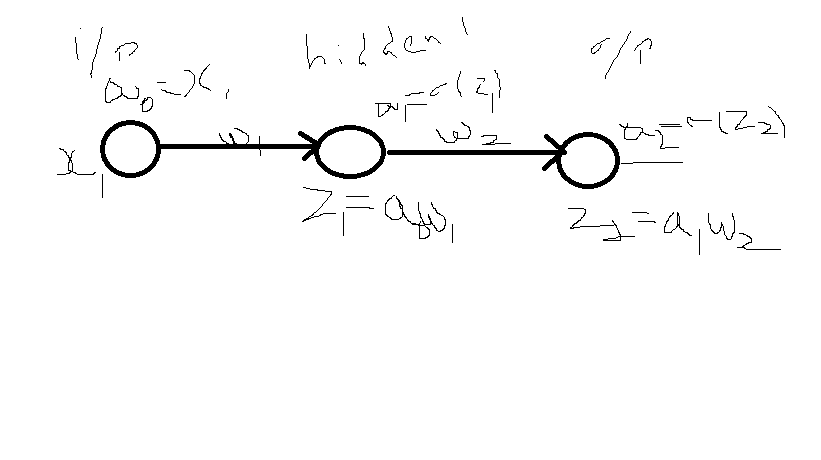

From above diagram and equation we need to find $$\frac{\partial e}{\partial w2}$$ for finding weight update.

Here e, error function is depend on $$w2$$ because $$e=\left ( y-a2 \right )^2$$ where $$y2=a2$$

so $e$ is function of $a2 $, i.e  $e=f(a2)$

$$a2 = \sigma (z2)$$

so $a2$ is function of $z2 $, i.e  $a2=f(z2)$
$$z2=a1.w2$$
so $z2$ is function of $w2 $, i.e  $z2=f(w2)$

Then $$\frac{\partial e}{\partial w2}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial w2}$$

Then $$\frac{\partial e}{\partial w2}=2(y-a2).\sigma (z2)(1-\sigma (z2)).a1$$


weight updation on output layer is $$w2=w2-\eta \frac{\partial e}{\partial w2}$$

now, we just go back one more step back on diagram then ,error function $e$ depends on $w1$ .

we need to update our network $w1$, i.e $$w1=w1-\eta \frac{\partial e}{\partial w1}$$

Then $$\frac{\partial e}{\partial w1}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial a1}.\frac{\partial a1}{\partial z1}.\frac{\partial z1}{\partial w1}$$

Then $$\frac{\partial e}{\partial w1}=2(y-a2).\sigma (z2)(1-\sigma (z2)).w1.\sigma (z1)(1-\sigma (z1)).a0$$

until now we are trying to update weights but we consider bias then we have to update bias for getting minimum or no error function.

bias update $$b2=b2-\eta \frac{\partial e}{\partial b2}$$

so Then $$\frac{\partial e}{\partial b2}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial b2}$$


Then $$\frac{\partial e}{\partial b2}=2(y-a2).\sigma (z2)(1-\sigma (z2)).1$$
simillarly,
$$\frac{\partial e}{\partial b1}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial a1}.\frac{\partial a1}{\partial z1}.\frac{\partial z1}{\partial b1}$$$

bias update $$b1=b1-\eta \frac{\partial e}{\partial b1}$$


## vanishing gradients
if the R.H.S side terms of below equation is less than 1 then product will be very less than zero.
i.e
$$\frac{\partial e}{\partial w2}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial w2}$$
for example 

$$\frac{\partial e}{\partial w2} = (0.1)(0.2)(0.3)$$
$$\frac{\partial e}{\partial w2} = 0.006$$

then weight update will be very less
$$w2=w2-\eta \frac{\partial e}{\partial w1}$$
$$w2=w2-\eta (0.006)$$
if the network level increses then weight update becomes very  very less. This is nothinng but vanishing gradients.

if neural network increses the gradient is becoming vanish.

The main disadvantages for this vanishing gradient are
1.Lower levels are hard to train
2.Training  will be slow

## exploding gradient
It is contrast to the vanishing gradients.

if the R.H.S side terms of below equation is greater than 1 then product will be very greater than zero.
i.e
$$\frac{\partial e}{\partial w2}=\frac{\partial e}{\partial a2}.\frac{\partial a2}{\partial z2}.\frac{\partial z2}{\partial w2}$$
for example 

$$\frac{\partial e}{\partial w2} = (10)(20)(30)$$
$$\frac{\partial e}{\partial w2} = 6000$$

then weight update will be very large
$$w2=w2-\eta \frac{\partial e}{\partial w1}$$
$$w2=w2-\eta (6000)$$
if the network level increses then weight update becomes very  very large. This is nothinng but Exploding gradients.

if neural network increses the gradient is becoming explode.

Disadvantages of explodinng gradients is, solution will be diverge.It mayn't reach gradient minimum. 


## solution for Vanishing gradient and Exploding gradient
gradients $\frac{\partial e}{\partial w2}$ depend on activation function $ \frac{\partial a2}{\partial z2}$ and weight intialization $\frac{\partial z2}{\partial w2}$.

so,if we choose different activation functions and weight intialization we can control the Vanishing gradient and Exploding gradient.

Main solution for this problem is fan-in and fan-outs of neurons are to be same.
$$fan_{in} = fan_{out} $$
i.e number of inputs is equal to number of outputs of a neuron.
And also variance of input and output same$$ \sigma ^{2}_{in} = \sigma ^{2}_{out}$$
then we can control the vanishing and explode gradients.
That means there is proper flow maintain from forward and backward propagation to the neuron then we can control the vanishing and explode gradients issue.
 
But practicle $fan_{in} = fan_{out} $ not always possible.
So, we have anther approch to control this issue, i.e
For sigmoid function,

1.weight intilized with $fan_{avg}  $,$$
fan_{avg}=(fan_{in} + fan_{out})/2 $$
2.Normal distribution with mean ($\mu $) = 0 and variance is $(1/fan_{avg})$
3.uniform  distribution between -r and r,  where r = $\sqrt{\frac{3}{fan_{avg}}}$

This uniform disribution is default distribution in keras.
The above both uniform and Normal distribution are called Glorot or Xavier distribution.


       initialization        activation

       Glorot              None,sigmoid,logistic, tanh,softmax

       He_normal           ReLu,its varients

     Lecun_normal               SELU


code:

tf.keras.layers.dense(unit,activation="activation_name",kernal_initlizer="initlization_name")


###speed of updating weights of layers
The weights of layers near to ouput layer is updated very faster than remaining layers like next layers in back propagation.


## weight initialization effect on weight update
1.Case 1: if weight is initialized with high value and activation function ($\sigma $)is sigmoid then $ \frac{\partial \sigma }{\partial z}$ becomes zero.
$$ \frac{\partial \sigma }{\partial z}=\sigma(1-\sigma)$$
for large values of w,$\sigma$ becomes one. Then $$ \frac{\partial \sigma }{\partial z}=1(1-1) = 0$$
$$\frac{\partial e }{\partial w}= 0
$$
Then weight update w is not happened because of zero result on error gradient. 

2.Case 2: if weight is initialized with low value and activation function ($\sigma $)is sigmoid then $ \frac{\partial \sigma }{\partial z}$ becomes zero.
$$ \frac{\partial \sigma }{\partial z}=\sigma(1-\sigma)$$
for large values of w,$\sigma$ becomes zero. Then $$ \frac{\partial \sigma }{\partial z}=0(1-0) = 0$$
$$\frac{\partial e }{\partial w}= 0
$$
Then weight update w is not happened because of zero result on error gradient.

means , for higher and lower values of weights initialization of neural network  for sigmoid function do not give any proper updations.

So, we need check another activation functions.







## Tanh(z) activation function
$$tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$
$$\frac{\partial tanh(z)}{\partial z}=1-tanh^{2}(z)$$

1.case 1: for weight intilized with high value then $tanh(z)$ becomes one. Then $\frac{\partial tanh(z)}{\partial z}$ becomes (1-1) = 0. That  doesn't show any changes on weight updation because $\frac{\partial e}{\partial w}$ will be zero.

2.case 2: for weight intilized with low value then $tanh(z)$ becomes -1. Then $\frac{\partial tanh(z)}{\partial z}$ becomes (1-1) = 0. That  doesn't show any changes on weight updation because $\frac{\partial e}{\partial w}$ will be zero.

so we need to choose compromised weight intilization between high and low values.

##ReLu(Z) activation function
ReLu(z) = z for z$\geq$0
         
        = 0 for z < 0
ReLu function doesn't have any exponential terms so, it is easy to calculate and less complexity. That maight help to get faster results compared to previous activations.

ReLu means Rectified Linear unit.
ReLu rectified the function when it is less than zero. so,the name comes Rectified and not only that it is linear or piece wise linear in nature.

Coming to weight intialization, if weight(w) is greater than zero and input is 1 then ReLu function becomes (a.w) = (x.w) = (1.w) = w.

Then differentiation of Relu w.r.t z becomes$$\frac{\partial ReLu(z)}{\partial z} = 1 , z\geq 1$$
so , 
$\frac{\partial e}{\partial w}$ has some value other than zero and weight updatation works  i.e $w=w-\eta \frac{\partial e}{\partial w}$.

for weight less than zero, all $\frac{\partial ReLu(z)}{\partial z}$,$\frac{\partial e}{\partial w}$ becomes zero that means no updatation to weight. i.e $w=w-\eta \frac{\partial e}{\partial w}$,$w=w-\eta .0$,$w=w$. changed weight w is equal to same as it as previous, i.e no updation.

This condition is called Dying ReLu.


### Transfer learning
Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

### Batch Normalization

Model will be slow or may have less accuracy even though we use Transfer learning and activation function. For this situation we can apply anthor method is Batch Normalization.

### Internal covariate shift (ICS)

We define Internal Covariate Shift as the change in the distribution of network activations due to the change in network parameters during training.

In neural networks, the output of the first layer feeds into the second layer, the output of the second layer feeds into the third, and so on. When the parameters of a layer change, so does the distribution of inputs to subsequent layers.


These shifts in input distributions can be problematic for neural networks, especially deep neural networks that could have a large number of layers.


Batch normalization is a method intended to mitigate internal covariate shift for neural networks.

We need to reduce the ICS to get faster convergence and faster training.

### Batch normalization
Training deep neural networks with tens of layers is challenging as they can be sensitive to the initial random weights and configuration of the learning algorithm.

One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each mini-batch when the weights are updated. This can cause the learning algorithm to forever chase a moving target. This change in the distribution of inputs to layers in the network is referred to the technical name “internal covariate shift.”


Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

The network converges fastly, when inputs are whitend. Whitend means uniformaly transformed to Zero mean and unit variance.
In general deep learning network takes input data in batches not in whole data at a time.

Batch normalization, name itself says the data will be taken in batches and normalize the data in each batch and each epoch. Overall the data must be in zero mean and unit variance i.e nothing but normalize the data.


### Optimizers

weight updations observations or draw backs for gradient desent(GD)

1.weight updation is directly proportional to $\frac{\partial e}{\partial w}$. Means if slope is high then weight updation is high,when  if slope is low then weight updation is low or slow.

2.weight udation is stuck at saddle point even though it didn't reach at local minimum.

3.It doesn't remember past updates.

4.It  is slow for deep neural networks.


SGD is fater than GD, because in GD data is processed at a time and for that GD cost function is complex for data but for SGD data is processed with single random row or few number of data rows at a time that makes less complexity.

SGD is faster than GD.

Mini batcher Optimizer is like intermideate of SGD and GD.
It can processed the data with mini batches wise.





We are going learn more optimizers to avoid problems of gradient desent(GD).

1) Momentum Optimization

>For this Momentum optimizer weight updation is $$ w = w-m$$

>where m is momentum, $ m =  \beta m + \eta \frac{\partial c}{\partial w}$ and $ \beta$ is coefficient of momentum.

In general $ \beta$ is 0.9.

>Advantages

  Reduces the oscillations and high variance of the parameters.

Converges faster than gradient descent.

>Disadvantages

One more hyper-parameter is added which needs to be selected manually and accurately.

> In Keras

optmizer_1 = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)


### Nesterov Accelerated Gradient(NAG) Optimizer

It is also called Nesterov Momentum Optimizer. It is faster than Momentum Optimizer.

weight update is as follows$$m=\beta m+\frac{\partial c}{\partial w}|w=(w-\beta m)$$

$$ w=w-m$$

Momentum may be a good method but if the momentum is too high the algorithm may miss the local minima and may continue to rise up.

So, to resolve this issue the NAG algorithm was developed.

We know we’ll be using $\beta m$ for modifying the weights so, $(w-\beta m)$ approximately tells us the future location. Now, we’ll calculate the cost based on this future parameter rather than the current one.

>Advantages:
Does not miss the local minima.
Slows if minima’s are occurring.

>Disadvantages:
Still, the hyperparameter needs to be selected manually.

>In keras 
optimizer_2 = tf.keras.optimizer.SGD(lr=0.01,momentum=0.9,nestrov=True)





### Adagrad (Adaptive Gradient) optimizer

One of the disadvantages of all the optimizers explained is that the learning rate is constant for all parameters and for each cycle.

 This optimizer changes the learning rate. It changes the learning rate ‘η’ for each parameter and at every time step ‘t’. 


weight updation$$s= s+(\frac{\partial c}{\partial w}|w=w )^{2}$$
$$ w=w-\frac{(\frac{\partial c}{\partial w})}{\sqrt{s+\varepsilon }}$$

>where s is scaling factor

>$\varepsilon$ is smoothing factor for to avoid zero division.
 $\varepsilon = 10^{-7}$


>Advantage:

No need to update the learning rate manually as it changes adaptively with iterations.

>Disadvantage:

As the number of iteration becomes very large learning rate decreases to a very small number which leads to slow convergence.

 
> In keras

tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad', **kwargs
)



### RMSprop optimizer

RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients. Hinton suggests γ be set to 0.9, while a good default value for the learning rate η is 0.001.

>keras
tf.keras.optimizer.RMSprop(leaning_rate=0.01,rho=0.9)

It is one of the popular optimizer before Adam optimizer.


### Adam optimizer

It is adaptive momentum optimizer.

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

Adam computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients vt like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients mt, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.

>keras
tf.keras.optimizer.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.99)


>Advantages:

The method is too fast and converges rapidly.
Rectifies vanishing learning rate, high variance.


>Disadvantages:

Computationally costly.

### which optimizer is good

For simple problems we can use SGD,NAG.

Best optimizer for now a days use are Adam, RMSProp.

### Regularization

One of the most common problem data science professionals face is to avoid overfitting.

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better.By Regularization we can slove the overfitting problems.

In machine learning, you will have a fair idea that regularization penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

>Cost function = Loss (say, binary cross entropy) + Regularization term

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

In L1, we have:

$$new-cost-function = old-cost-function + \alpha *\sum W$$

In L2, we have:

$$new-cost-function = old-cost-function + \alpha *\sum (W)^2$$

>In keras

from keras import regularizers

model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01)


model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l1(0.1)
              

model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l1_l2(0.1,0.01)
                

>for max regularization

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01),
                           kernel_constraint=keras.constraints.max_norm(1.))
                      

### Dropout Regularization

This is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.

 At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.

 So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. As seen in the image above, dropout can be applied to both the hidden layers as well as the input layers


>in keras


from keras.layers.core import Dropout

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])